In [1]:
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### USDJPY daily red/green 
Show low standard deviation result and highlight problems:
- Number of trades very low, could hinder achieving a good significance level
- therefore approach with minute data to have more data

In [2]:
USDJPY_d_redgreen = pd.read_csv('./cleaned_datafiles/after_testing/usdjpy_D_2_red_green.csv')
USDJPY_d_redgreen

,date,open,close,diff_open_close,classification,order_type,profit
0,2005-01-03,20548.0,20564.0,16.0,1,long,16.0
1,2005-01-04,20564.0,20888.0,324.0,1,short,-324.0
2,2005-01-05,20888.0,20820.0,-68.0,-1,short,68.0
3,2005-01-06,20820.0,20984.0,164.0,1,long,164.0
4,2005-01-07,20984.0,20964.0,-20.0,-1,short,20.0
...,...,...,...,...,...,...,...
5076,2023-02-27,27285.0,27231.0,-54.0,-1,short,54.0
5077,2023-02-28,27224.0,27225.0,1.0,1,long,1.0
5078,2023-03-01,27211.0,27230.0,19.0,1,short,-19.0
5079,2023-03-02,27228.0,27350.0,122.0,1,short,-122.0


#### Create function for cumulative profit column

In [3]:
def cumProfit(df):
    df['cumulative_profit'] = df['profit'].cumsum()
    
    return df

In [4]:
USDJPY_d_redgreen = cumProfit(USDJPY_d_redgreen)
USDJPY_d_redgreen

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2005-01-03,20548.0,20564.0,16.0,1,long,16.0,16.0
1,2005-01-04,20564.0,20888.0,324.0,1,short,-324.0,-308.0
2,2005-01-05,20888.0,20820.0,-68.0,-1,short,68.0,-240.0
3,2005-01-06,20820.0,20984.0,164.0,1,long,164.0,-76.0
4,2005-01-07,20984.0,20964.0,-20.0,-1,short,20.0,-56.0
...,...,...,...,...,...,...,...,...
5076,2023-02-27,27285.0,27231.0,-54.0,-1,short,54.0,-44.4
5077,2023-02-28,27224.0,27225.0,1.0,1,long,1.0,-43.4
5078,2023-03-01,27211.0,27230.0,19.0,1,short,-19.0,-62.4
5079,2023-03-02,27228.0,27350.0,122.0,1,short,-122.0,-184.4


#### CSV file for Tableau

In [5]:
#USDJPY_d_redgreen.to_csv('./datafiles_for_tableau/usdjpy_day_redgreen.csv', index=False)

#### Visualize number of trades (also non trades included)  vs cumulative profit

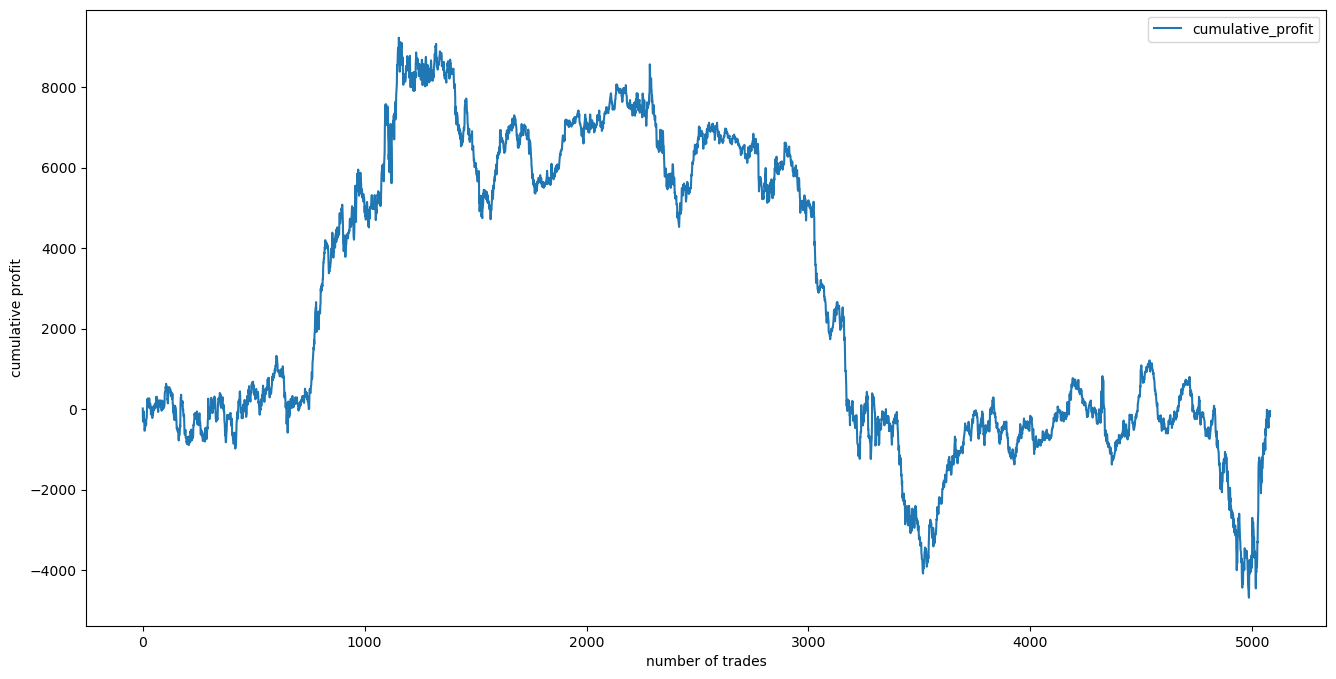

In [6]:
USDJPY_d_redgreen[['cumulative_profit']].plot(label='USDJPY_day_redgreen',
                                  figsize=(16, 8))
plt.xlabel('number of trades')
plt.ylabel('cumulative profit')
plt.savefig('./figures/USDJPY_day_redgreen.png')
plt.show()

#### USDJPY minute redgreen:
To show the far better results and higher siginificance compared to daily data due to more data.
Highlight problems: 
- Massive number of trades
- In real life no profit due to costs

In [7]:
USDJPY_min_redgreen = pd.read_csv('./cleaned_datafiles/after_testing/usdjpy_minute_red_green.csv')
USDJPY_min_redgreen

,date,open,close,diff_open_close,classification,order_type,profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,-1,long,-6.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,-1,long,-2.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,-1,long,-2.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,-1,long,-8.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,long,0.0
...,...,...,...,...,...,...,...
5999380,2023-03-03 15:00:00,27208.0,27201.0,-7.0,-1,long,-7.0
5999381,2023-03-03 15:01:00,27201.0,27223.0,22.0,1,long,22.0
5999382,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0
5999383,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0


In [8]:
USDJPY_min_redgreen = cumProfit(USDJPY_min_redgreen)
USDJPY_min_redgreen

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,-1,long,-6.0,-6.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,-1,long,-2.0,-8.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,-1,long,-2.0,-10.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,-1,long,-8.0,-18.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,long,0.0,-18.0
...,...,...,...,...,...,...,...,...
5999380,2023-03-03 15:00:00,27208.0,27201.0,-7.0,-1,long,-7.0,63812.0
5999381,2023-03-03 15:01:00,27201.0,27223.0,22.0,1,long,22.0,63834.0
5999382,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0,63815.0
5999383,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0,63805.0


#### csv for Tableau

In [9]:
#USDJPY_min_redgreen.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen.csv', index=False)

#### Visualize cumulative profit USDJPY minute red green

<AxesSubplot:>

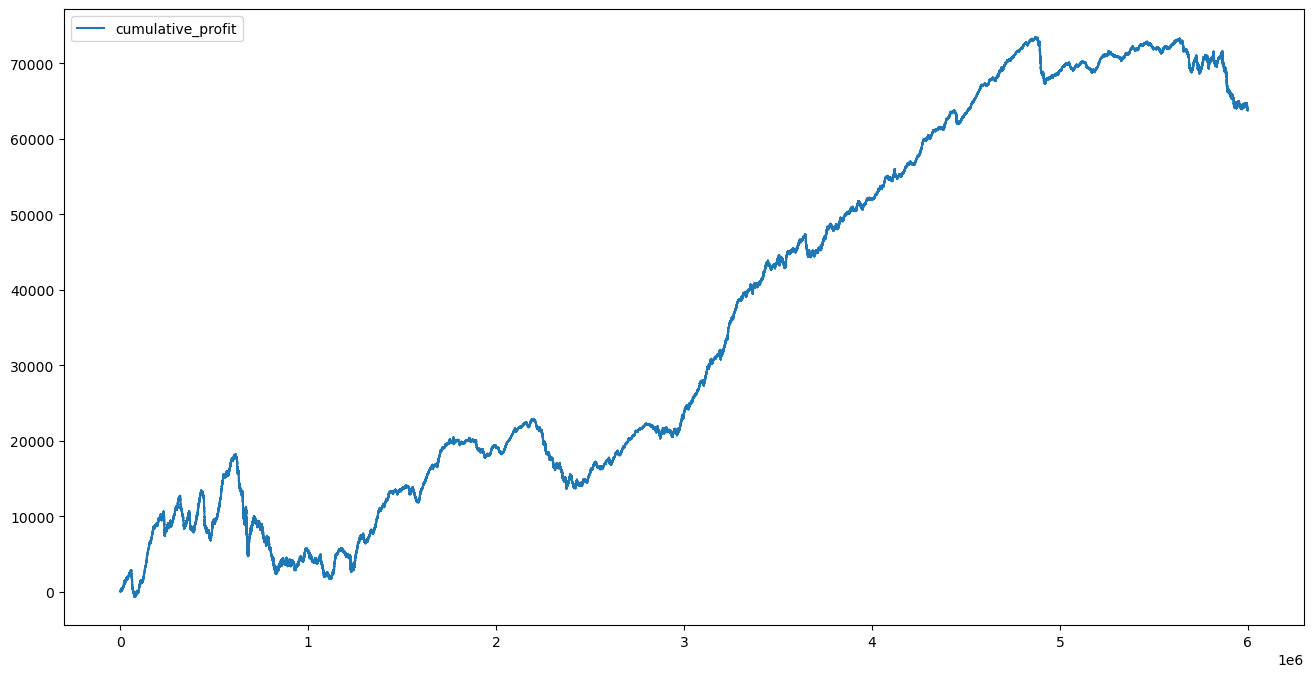

In [10]:
USDJPY_min_redgreen[['cumulative_profit']].plot(label='USDJPY_minute_redgreen',
                                  figsize=(16, 8))

#### Get dataset just with long and short trades

In [11]:
USDJPY_min_redgreen_trades = USDJPY_min_redgreen[USDJPY_min_redgreen['order_type'].isin(['long', 'short'])].reset_index(drop=True)
USDJPY_min_redgreen_trades

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,-1,long,-6.0,-6.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,-1,long,-2.0,-8.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,-1,long,-2.0,-10.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,-1,long,-8.0,-18.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,long,0.0,-18.0
...,...,...,...,...,...,...,...,...
4424364,2023-03-03 15:00:00,27208.0,27201.0,-7.0,-1,long,-7.0,63812.0
4424365,2023-03-03 15:01:00,27201.0,27223.0,22.0,1,long,22.0,63834.0
4424366,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0,63815.0
4424367,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0,63805.0


#### Visualize trades vs cumulative profit

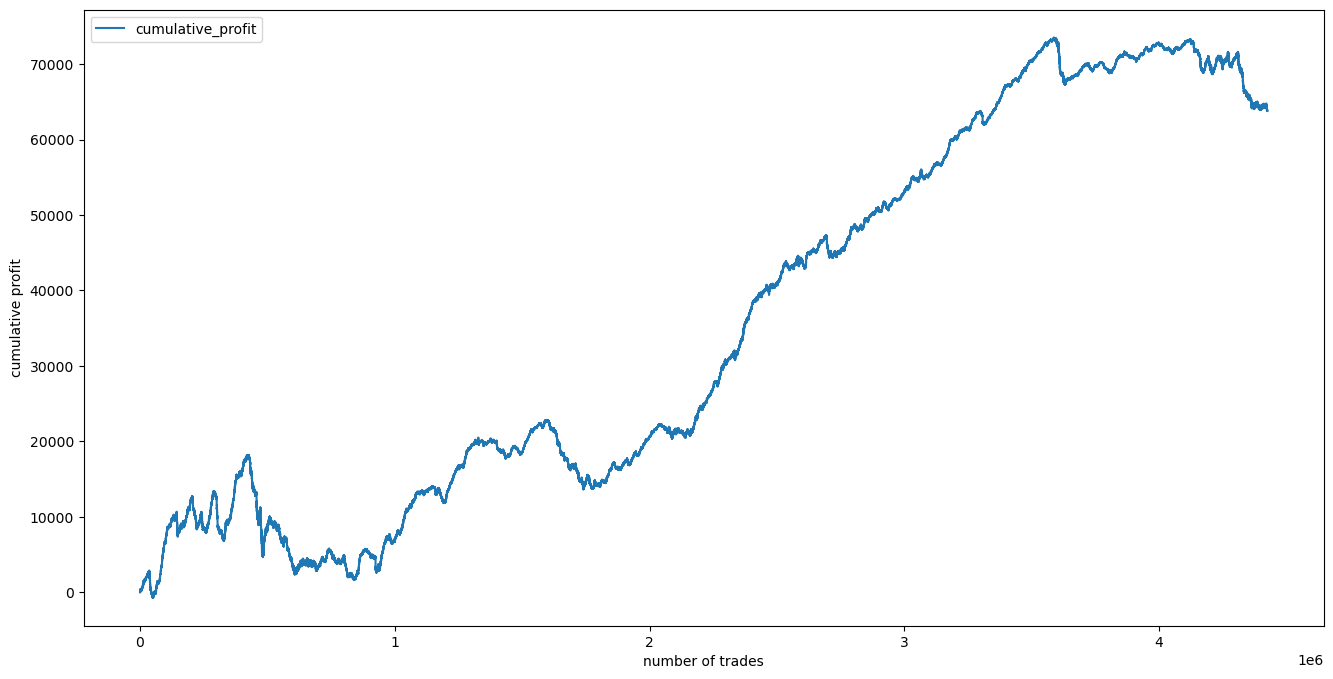

In [12]:
USDJPY_min_redgreen_trades[['cumulative_profit']].plot(label='USDJPY_min_redgreen_trades',
                                  figsize=(16, 8))
plt.xlabel('number of trades')
plt.ylabel('cumulative profit')
plt.savefig('./figures/USDJPY_minute_redgreen.png')
plt.show()

##### Much better profit, but number of trades and after substraction of costs, no profit anymore 

#### USDJPY minute redgreen strategy adaption
explaining the adaptation
- aim is to reduce the massive number of trades, most of them are just plus minus 0
- show the first with factor 3 and explain why its not chosen --> profit below 0 due to costs
- show the best with factor 15

In [13]:
USDJPY_min_redgreen_3 = pd.read_csv('./cleaned_datafiles/after_testing/usdjpy_minute_redgreen_adap.csv')
USDJPY_min_redgreen_3

,date,open,close,diff_open_close,classification,order_type,profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,0,none,0.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,0,none,0.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,0,none,0.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,0,none,0.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,none,0.0
...,...,...,...,...,...,...,...
5999380,2023-03-03 15:00:00,27208.0,27201.0,-7.0,0,none,0.0
5999381,2023-03-03 15:01:00,27201.0,27223.0,22.0,1,none,0.0
5999382,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0
5999383,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0


In [14]:
USDJPY_min_redgreen_3 = cumProfit(USDJPY_min_redgreen_3)
USDJPY_min_redgreen_3

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,0,none,0.0,0.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,0,none,0.0,0.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,0,none,0.0,0.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,0,none,0.0,0.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,none,0.0,0.0
...,...,...,...,...,...,...,...,...
5999380,2023-03-03 15:00:00,27208.0,27201.0,-7.0,0,none,0.0,38309.0
5999381,2023-03-03 15:01:00,27201.0,27223.0,22.0,1,none,0.0,38309.0
5999382,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0,38290.0
5999383,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0,38280.0


#### csv file for Tableau

In [15]:
#USDJPY_min_redgreen_3.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_factor3.csv', index=False)

#### Visualize cumulative profit

<AxesSubplot:>

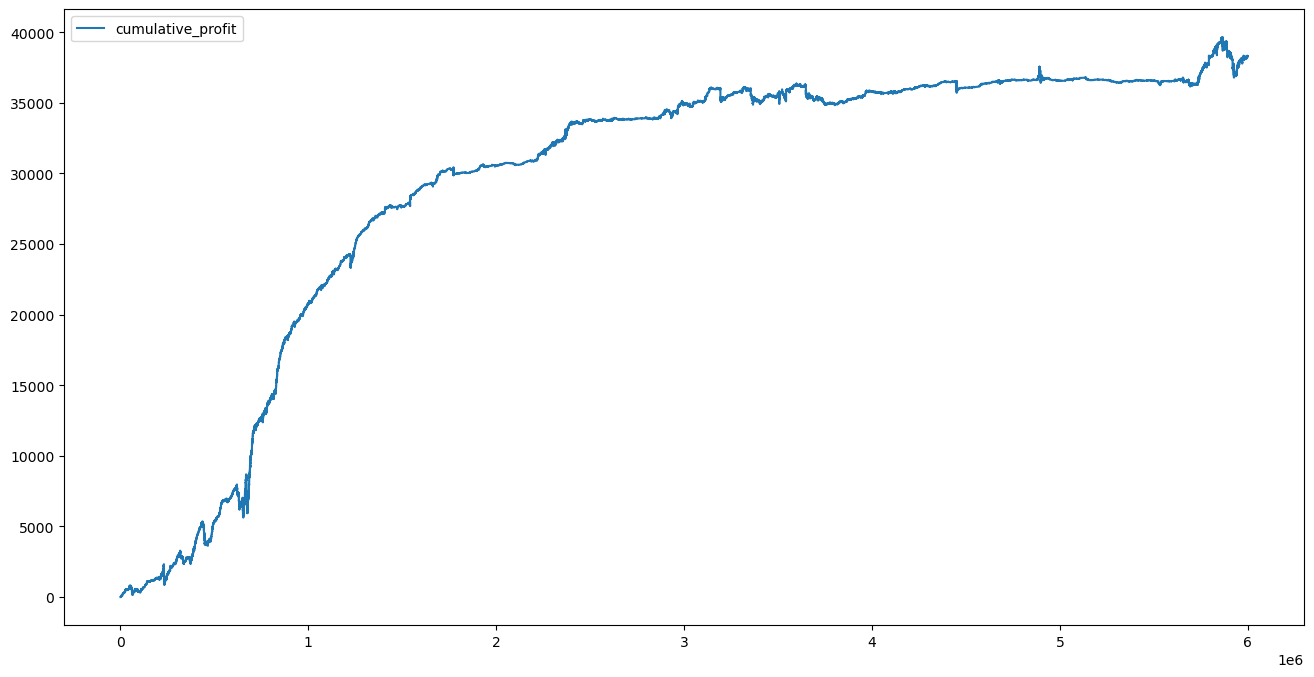

In [16]:
USDJPY_min_redgreen_3[['cumulative_profit']].plot(label='USDJPY_min_redgreen_3',
                                  figsize=(16, 8))

In [17]:
USDJPY_min_redgreen_3_trades = USDJPY_min_redgreen_3[USDJPY_min_redgreen_3['order_type'].isin(['long', 'short'])].reset_index(drop=True)
USDJPY_min_redgreen_3_trades

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2007-01-02 00:41:00,23712.0,23718.0,6.0,0,long,6.0,6.0
1,2007-01-02 07:01:00,23748.0,23750.0,2.0,0,short,-2.0,4.0
2,2007-01-02 09:01:00,23714.0,23712.0,-2.0,0,long,-2.0,2.0
3,2007-01-02 09:27:00,23738.0,23746.0,8.0,0,short,-8.0,-6.0
4,2007-01-02 12:53:00,23758.0,23760.0,2.0,0,long,2.0,-4.0
...,...,...,...,...,...,...,...,...
140141,2023-03-03 14:50:00,27186.0,27189.0,3.0,0,long,3.0,38312.0
140142,2023-03-03 14:53:00,27208.0,27211.0,3.0,0,short,-3.0,38309.0
140143,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0,38290.0
140144,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0,38280.0


#### Visualize cumulative profit and number of trades

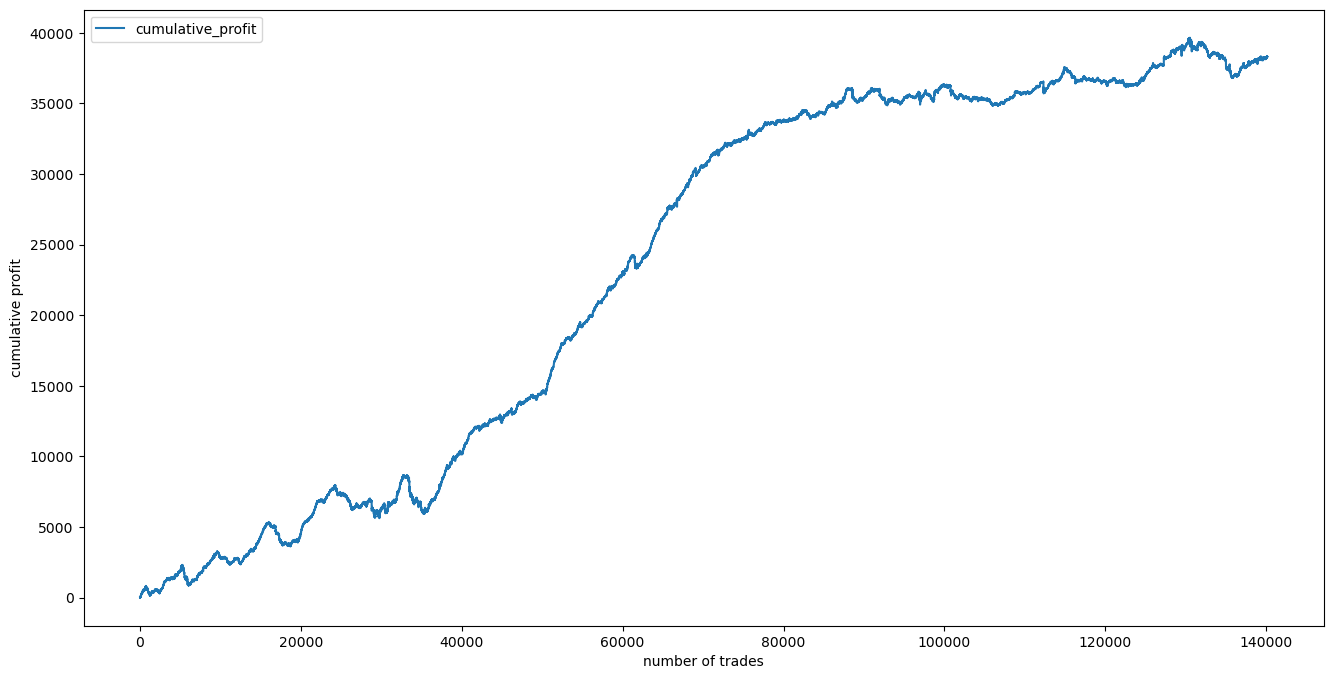

In [18]:
USDJPY_min_redgreen_3_trades[['cumulative_profit']].plot(label='USDJPY_min_redgreen_3_trades',
                                  figsize=(16, 8))
plt.xlabel('number of trades')
plt.ylabel('cumulative profit')
plt.savefig('./figures/USDJPY_minute_redgreen_factor3.png')
plt.show()

#### Calculate real profit (profit - costs) and cumulative profit 

In [19]:
USDJPY_min_redgreen_3_trades_real = USDJPY_min_redgreen_3_trades
USDJPY_min_redgreen_3_trades_real['real_profit'] = USDJPY_min_redgreen_3_trades_real['profit'] - 2
USDJPY_min_redgreen_3_trades_real

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit,real_profit
0,2007-01-02 00:41:00,23712.0,23718.0,6.0,0,long,6.0,6.0,4.0
1,2007-01-02 07:01:00,23748.0,23750.0,2.0,0,short,-2.0,4.0,-4.0
2,2007-01-02 09:01:00,23714.0,23712.0,-2.0,0,long,-2.0,2.0,-4.0
3,2007-01-02 09:27:00,23738.0,23746.0,8.0,0,short,-8.0,-6.0,-10.0
4,2007-01-02 12:53:00,23758.0,23760.0,2.0,0,long,2.0,-4.0,0.0
...,...,...,...,...,...,...,...,...,...
140141,2023-03-03 14:50:00,27186.0,27189.0,3.0,0,long,3.0,38312.0,1.0
140142,2023-03-03 14:53:00,27208.0,27211.0,3.0,0,short,-3.0,38309.0,-5.0
140143,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0,38290.0,-21.0
140144,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0,38280.0,-12.0


In [20]:
USDJPY_min_redgreen_3_trades_real['cumulative_profit_real'] = USDJPY_min_redgreen_3_trades_real['real_profit'].cumsum()
USDJPY_min_redgreen_3_trades_real

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit,real_profit,cumulative_profit_real
0,2007-01-02 00:41:00,23712.0,23718.0,6.0,0,long,6.0,6.0,4.0,4.0
1,2007-01-02 07:01:00,23748.0,23750.0,2.0,0,short,-2.0,4.0,-4.0,0.0
2,2007-01-02 09:01:00,23714.0,23712.0,-2.0,0,long,-2.0,2.0,-4.0,-4.0
3,2007-01-02 09:27:00,23738.0,23746.0,8.0,0,short,-8.0,-6.0,-10.0,-14.0
4,2007-01-02 12:53:00,23758.0,23760.0,2.0,0,long,2.0,-4.0,0.0,-14.0
...,...,...,...,...,...,...,...,...,...,...
140141,2023-03-03 14:50:00,27186.0,27189.0,3.0,0,long,3.0,38312.0,1.0,-241972.0
140142,2023-03-03 14:53:00,27208.0,27211.0,3.0,0,short,-3.0,38309.0,-5.0,-241977.0
140143,2023-03-03 15:02:00,27223.0,27242.0,19.0,1,short,-19.0,38290.0,-21.0,-241998.0
140144,2023-03-03 15:03:00,27242.0,27252.0,10.0,1,short,-10.0,38280.0,-12.0,-242010.0


#### Visualize real cumulative profit after costs

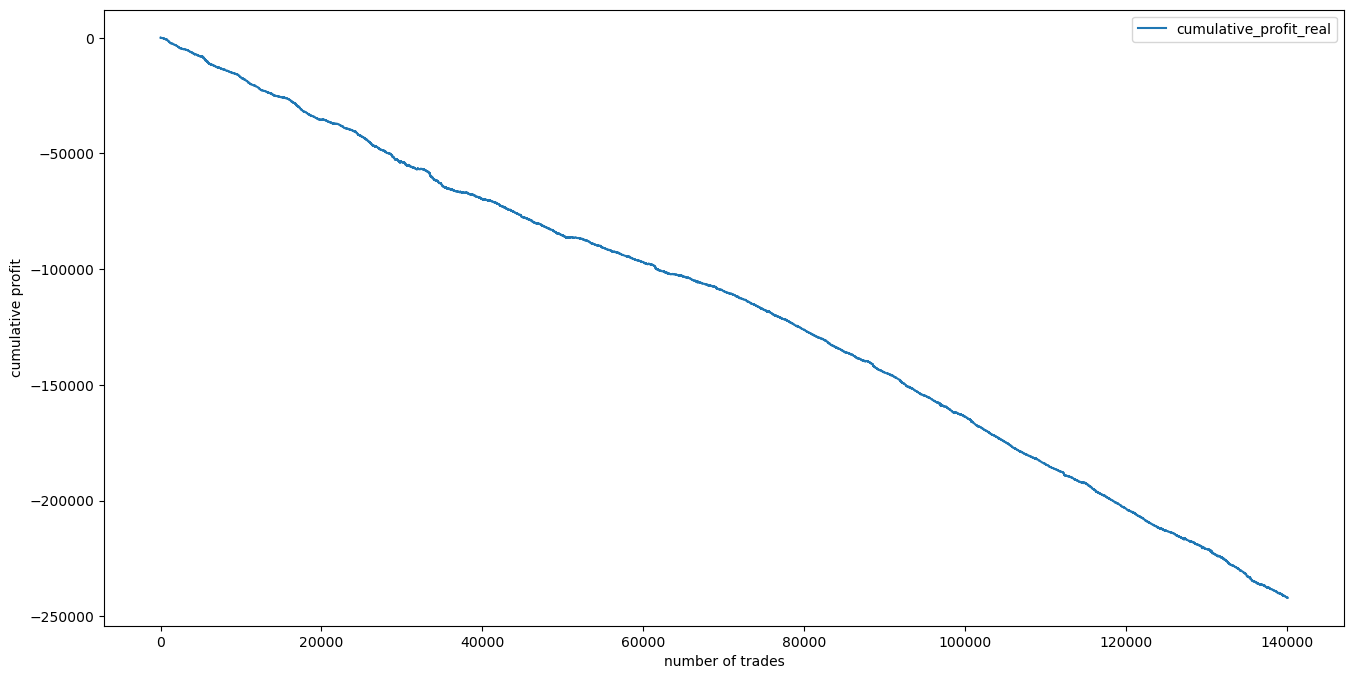

In [21]:
USDJPY_min_redgreen_3_trades_real[['cumulative_profit_real']].plot(label='USDJPY_min_redgreen_3_trades_real',
                                  figsize=(16, 8))
plt.xlabel('number of trades')
plt.ylabel('cumulative profit')
plt.savefig('./figures/USDJPY_minute_redgreen_factor3_realprof.png')
plt.show()

#### Best strategy with factor 15 USDJPY minute:
profit above 0 and std 5.22

In [22]:
USDJPY_min_redgreen_15 = pd.read_csv('./cleaned_datafiles/after_testing/usdjpy_minute_redgreen_adap_factor15.csv')
USDJPY_min_redgreen_15

,date,open,close,diff_open_close,classification,order_type,profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,0,none,0.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,0,none,0.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,0,none,0.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,0,none,0.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,none,0.0
...,...,...,...,...,...,...,...
5999380,2023-03-03 15:00:00,27208.0,27201.0,-7.0,0,none,0.0
5999381,2023-03-03 15:01:00,27201.0,27223.0,22.0,0,none,0.0
5999382,2023-03-03 15:02:00,27223.0,27242.0,19.0,0,none,0.0
5999383,2023-03-03 15:03:00,27242.0,27252.0,10.0,0,none,0.0


In [23]:
USDJPY_min_redgreen_15 = cumProfit(USDJPY_min_redgreen_15)
USDJPY_min_redgreen_15

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2007-01-02 00:31:00,23752.0,23746.0,-6.0,0,none,0.0,0.0
1,2007-01-02 00:32:00,23746.0,23744.0,-2.0,0,none,0.0,0.0
2,2007-01-02 00:33:00,23744.0,23742.0,-2.0,0,none,0.0,0.0
3,2007-01-02 00:34:00,23742.0,23734.0,-8.0,0,none,0.0,0.0
4,2007-01-02 00:35:00,23734.0,23734.0,0.0,0,none,0.0,0.0
...,...,...,...,...,...,...,...,...
5999380,2023-03-03 15:00:00,27208.0,27201.0,-7.0,0,none,0.0,5147.0
5999381,2023-03-03 15:01:00,27201.0,27223.0,22.0,0,none,0.0,5147.0
5999382,2023-03-03 15:02:00,27223.0,27242.0,19.0,0,none,0.0,5147.0
5999383,2023-03-03 15:03:00,27242.0,27252.0,10.0,0,none,0.0,5147.0


In [24]:
#USDJPY_min_redgreen_15.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_factor15.csv', index=False)

<AxesSubplot:>

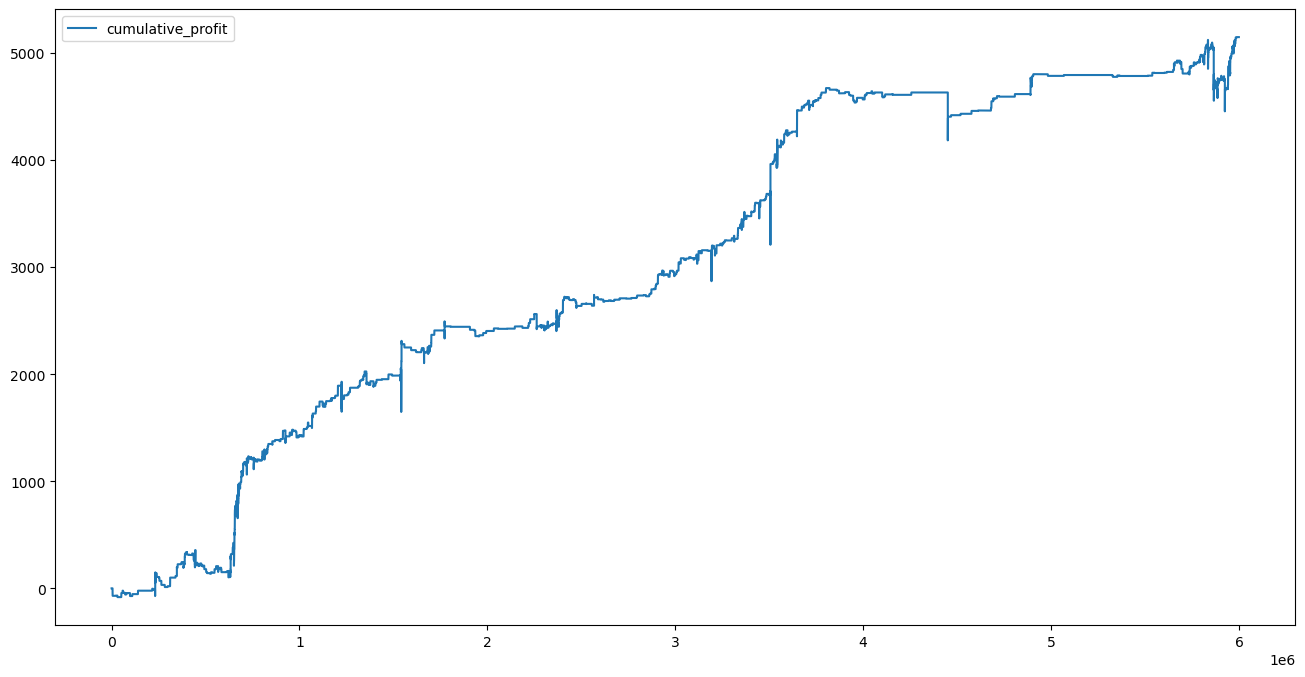

In [25]:
USDJPY_min_redgreen_15[['cumulative_profit']].plot(label='USDJPY_min_redgreen_15',
                                  figsize=(16, 8))

In [26]:
USDJPY_min_redgreen_15_trades = USDJPY_min_redgreen_15[USDJPY_min_redgreen_15['order_type'].isin(['long', 'short'])].reset_index(drop=True)
USDJPY_min_redgreen_15_trades

,date,open,close,diff_open_close,classification,order_type,profit,cumulative_profit
0,2007-01-05 13:32:00,23650.0,23706.0,56.0,1,short,-56.0,-56.0
1,2007-01-05 13:33:00,23706.0,23720.0,14.0,0,short,-14.0,-70.0
2,2007-01-24 15:14:00,24214.0,24216.0,2.0,0,long,2.0,-68.0
3,2007-01-31 16:00:00,24204.0,24190.0,-14.0,0,long,-14.0,-82.0
4,2007-02-14 23:52:00,24054.0,24054.0,0.0,0,long,0.0,-82.0
...,...,...,...,...,...,...,...,...
1445,2023-02-12 22:16:00,26275.0,26276.0,1.0,0,long,1.0,5087.0
1446,2023-02-14 13:32:00,26520.0,26487.0,-33.0,0,short,33.0,5120.0
1447,2023-02-14 13:34:00,26329.0,26332.0,3.0,0,long,3.0,5123.0
1448,2023-02-15 13:32:00,26792.0,26770.0,-22.0,0,short,22.0,5145.0


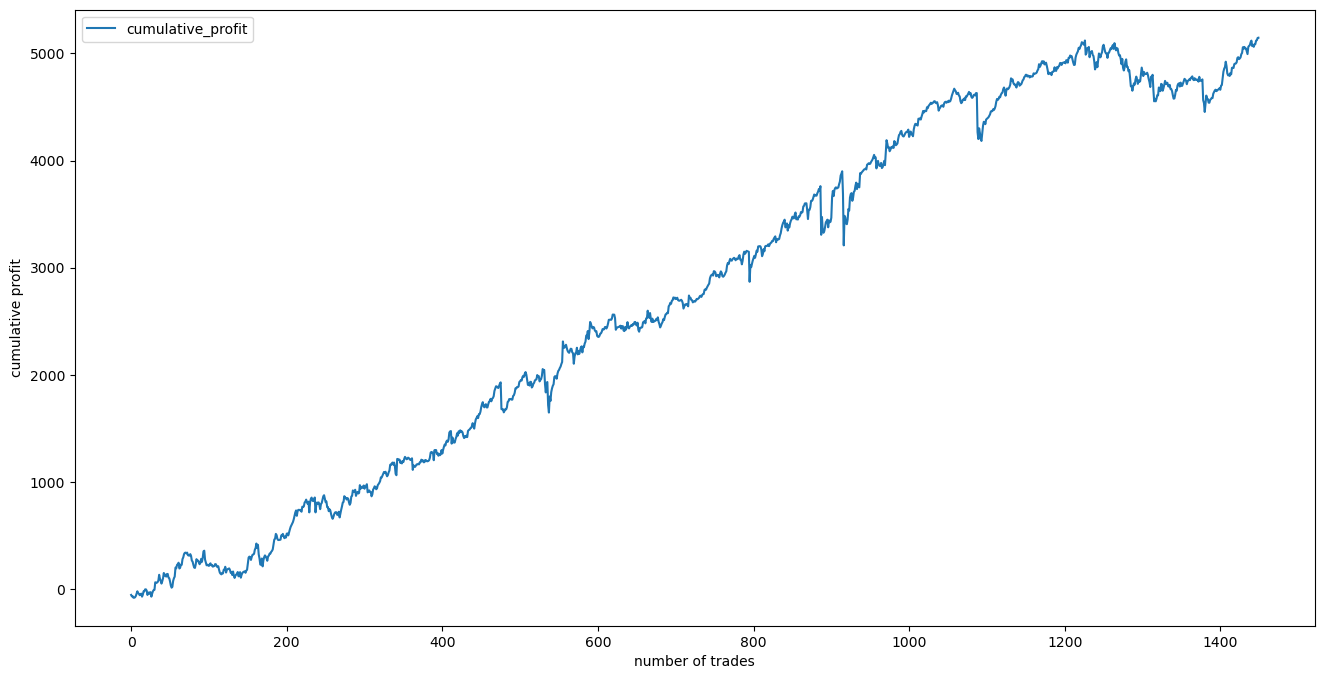

In [27]:
USDJPY_min_redgreen_15_trades[['cumulative_profit']].plot(label='USDJPY_min_redgreen_15_trades',
                                  figsize=(16, 8))
plt.xlabel('number of trades')
plt.ylabel('cumulative profit')
plt.savefig('./figures/USDJPY_minute_redgreen_factor15.png')
plt.show()

In [28]:
USDJPY_min_redgreen_15_trades_real = USDJPY_min_redgreen_15_trades
USDJPY_min_redgreen_15_trades_real['real_profit'] = USDJPY_min_redgreen_15_trades_real['profit'] - 2
USDJPY_min_redgreen_15_trades_real['cumulative_profit_real'] = USDJPY_min_redgreen_15_trades_real['real_profit'].cumsum()

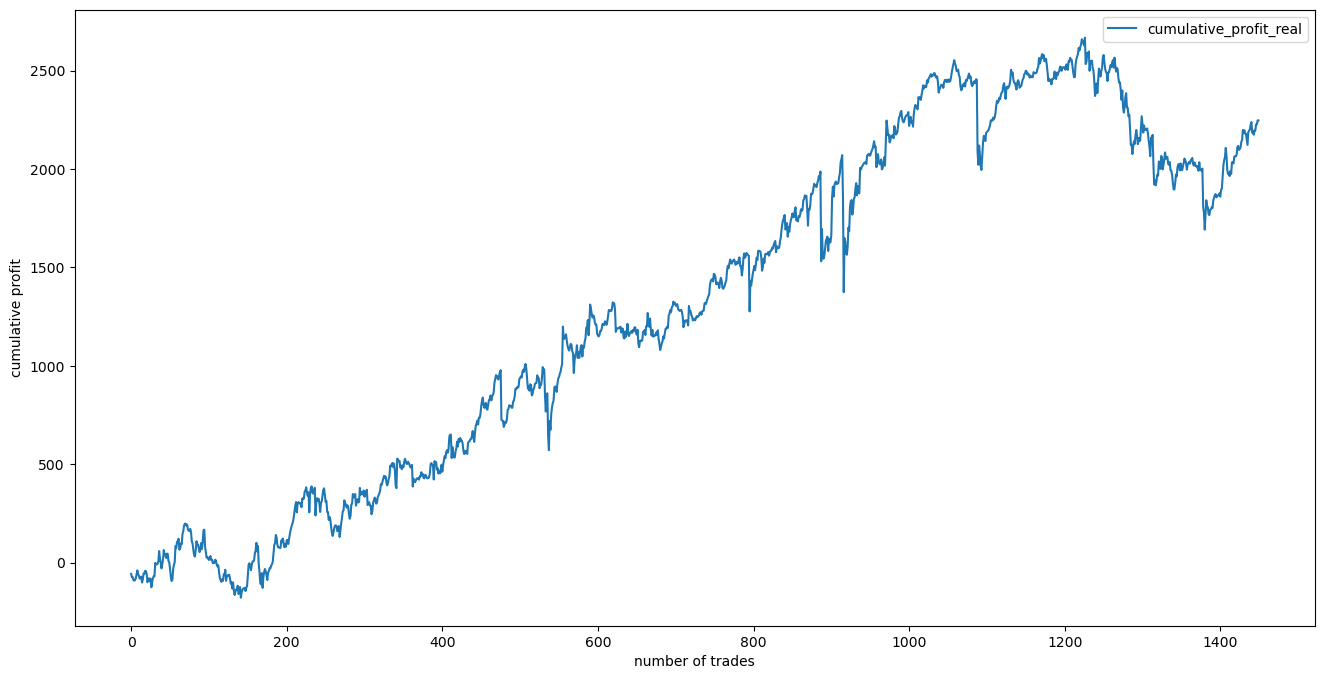

In [29]:
USDJPY_min_redgreen_15_trades_real[['cumulative_profit_real']].plot(label='USDJPY_min_redgreen_15_trades_real',
                                  figsize=(16, 8))
plt.xlabel('number of trades')
plt.ylabel('cumulative profit')
plt.savefig('./figures/USDJPY_minute_redgreen_factor15_realprof.png')
plt.show()

#### Other trading pair dailies EURUSD, GBPUSD and USDCAD were tested but did not result in standard deviations above the significance level and wont be shown here
Further, other two strategies (reversed candle and moving average) did not result in significant standard deviations and therefore not visually analyzed

#### Further datasets for Tableau

In [31]:
USDJPY_min_redgreen_trades.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_trades.csv')
USDJPY_min_redgreen_3_trades.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_trades_factor3_trades.csv')
USDJPY_min_redgreen_3_trades_real.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_trades_factor3_trades_real.csv')
USDJPY_min_redgreen_15_trades.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_trades_factor15_trades.csv')
USDJPY_min_redgreen_15_trades_real.to_csv('./datafiles_for_tableau/usdjpy_minute_redgreen_trades_factor15_trades_real.csv')